In [118]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('dark_background')

Link to the file: https://docs.google.com/spreadsheets/d/1HUJKk0bS_QV6r7pvuu-kY0alIcl0Ilzy/edit?usp=sharing&ouid=116859182279794978299&rtpof=true&sd=true

In [119]:
!gdown --id 1HUJKk0bS_QV6r7pvuu-kY0alIcl0Ilzy

Downloading...
From: https://drive.google.com/uc?id=1HUJKk0bS_QV6r7pvuu-kY0alIcl0Ilzy
To: /content/Problem1.xlsx
100% 958k/958k [00:00<00:00, 82.4MB/s]


In [120]:
df = pd.read_excel('/content/drive/MyDrive/expert_ra/Problem1.xlsx').drop(['Unnamed: 0'],axis=1)

# Задача 1 (общая работа с Python, бинарная классификация, библиотеки pandas, numpy, scipy, matplotlib).


Table description
*   ID - Идентификатор записи в таблице
*   Warehouse_block - Обозначение блока склада, с которого производилась доставка
*   Mode_of_Shipment - Метка метода доставки
*   Customer_care_calls - Количество звонков, совершенных для запроса отгрузки со склада
*   Customer_rating - Рейтинг клиента
*   Cost_of_the_Product - Цена продукта
*   Prior_purchases - Количество предыдущих покупок клиента
*   Product_importance - Внутренняя маркировка магазина о степени приоритетности
*   Gender - Пол клиента
*   Discount_offered - Предложенная скидка на покупку
*   Weight_in_gms - Вес посылки
*   Reached.on.Time_Y.N - Флаг, отвечающий за факт своевременной доставки (target)
*   proba1 - Вероятность своевременной доставки, полученная классификатором 1
*   proba2 - Вероятность своевременной доставки, полученная классификатором 2

##### 1. Сформировать DataFrame с исходными данными. 

In [121]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,proba1,proba2
0,1,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0
1,2,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0
2,3,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0
3,4,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0
4,5,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0


In [122]:
df.columns = df.columns.str.replace('.','_').str.lower()

In [123]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2
0,1,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0
1,2,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0
2,3,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0
3,4,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0
4,5,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0


In [124]:
df.isna().mean()

id                     0.0
warehouse_block        0.0
mode_of_shipment       0.0
customer_care_calls    0.0
customer_rating        0.0
cost_of_the_product    0.0
prior_purchases        0.0
product_importance     0.0
gender                 0.0
discount_offered       0.0
weight_in_gms          0.0
reached_on_time_y_n    0.0
proba1                 0.0
proba2                 0.0
dtype: float64

There are not gaps in fields - it's ok.

In [125]:
print('The shape of the data is', df.shape)

The shape of the data is (10999, 14)


##### 2. Вычислить и вывести в консоль коэффициенты попарной корреляции между каждым из объясняющих полей и целевым полем. Соотнести полученные коэффициенты корреляции и экономический/логический смысл взаимоотношений между величинами, указанными в полях, и целевой величиной.

In [126]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2
0,1,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0
1,2,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0
2,3,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0
3,4,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0
4,5,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0


In [127]:
task2_df = df[['reached_on_time_y_n', 'warehouse_block', 'mode_of_shipment', 
        'customer_care_calls','customer_rating', 'cost_of_the_product', 
        'prior_purchases','product_importance', 'gender', 'discount_offered', 
        'weight_in_gms'
       ]]
task2_df.head()

,reached_on_time_y_n,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms
0,1,D,Flight,4,2,177,3.0,low,F,44,1233
1,1,F,Flight,4,5,216,2.0,low,M,59,3088
2,1,A,Flight,2,2,183,4.0,low,M,48,3374
3,1,B,Flight,3,3,176,4.0,medium,M,10,1177
4,1,C,Flight,2,2,184,3.0,medium,F,46,2484


Let's map text features for calculate correlation matrix

In [128]:
warehouse_block_map = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'F': 4
}

mode_of_shipment_map = {
    'Flight': 0,
    'Road': 1,
    'Ship': 2
}

product_importance_map = {
    'high': 0,
    'low': 1,
    'medium': 2
}

gender_map = {
    'F': 0,
    'M':1
}
task2_df['warehouse_block'] = task2_df['warehouse_block'].map(warehouse_block_map)
task2_df['mode_of_shipment'] = task2_df['mode_of_shipment'].map(mode_of_shipment_map)
task2_df['product_importance'] = task2_df['product_importance'].map(product_importance_map)
task2_df['gender'] = task2_df['gender'].map(gender_map)

In [129]:
task2_df.corr() \
    .sort_values('reached_on_time_y_n', ascending=False)['reached_on_time_y_n'] \
    .to_frame()

,reached_on_time_y_n
reached_on_time_y_n,1.000000
discount_offered,0.397108
customer_rating,0.013119
warehouse_block,0.005214
gender,0.004689
mode_of_shipment,-0.000535
product_importance,-0.023483
prior_purchases,-0.055515
customer_care_calls,-0.067126
cost_of_the_product,-0.073587


Discount_offered and weight_in_gms have better correlation with target variable, while it must be said that discount_offered have positive correlation (0.4) and weight_in_gms - negative(-0.27). Interpretation may be sound like this: when discount offered is growth, than timely delivery works better (may be discount provided for perishable goods or seasonable goods); in case with package weight - oversized goods (like furniture) need special transport for delivery, which have special timetable.

##### 3. Вычислить среднее значение для каждого из числовых объясняющих полей в выборке. Для текстовых полей вычислить наиболее распространенное значение. На основе полученных данных скомпоновать и вывести в консоль «типичные» параметры доставки для данной выборки.

In [130]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2
0,1,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0
1,2,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0
2,3,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0
3,4,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0
4,5,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0


In [131]:
df.dtypes

id                       int64
warehouse_block         object
mode_of_shipment        object
customer_care_calls      int64
customer_rating          int64
cost_of_the_product      int64
prior_purchases        float64
product_importance      object
gender                  object
discount_offered         int64
weight_in_gms            int64
reached_on_time_y_n      int64
proba1                 float64
proba2                 float64
dtype: object

In [132]:
typical_pararams = df[
    ['customer_care_calls', 'customer_rating', 'cost_of_the_product',
    'prior_purchases', 'discount_offered', 'weight_in_gms']
].mean().to_frame()
typical_pararams.columns = ['mean_value']
typical_pararams

,mean_value
customer_care_calls,4.054459
customer_rating,2.990545
cost_of_the_product,210.196836
prior_purchases,3.567597
discount_offered,13.373216
weight_in_gms,3634.016729


In [133]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2
0,1,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0
1,2,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0
2,3,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0
3,4,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0
4,5,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0


Compose and output to the console "typical" delivery parameters for the given selection

In [134]:
temp = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']
for i in temp:
  display(df[i].value_counts(normalize=True).to_frame())

,warehouse_block
F,0.333303
D,0.166742
A,0.166652
B,0.166652
C,0.166652


,mode_of_shipment
Ship,0.678425
Flight,0.161560
Road,0.160015


,product_importance
low,0.481589
medium,0.432221
high,0.086190


,gender
F,0.504137
M,0.495863


##### Для каждого классификатора, для которых указана прогнозируемая вероятность своевременной доставки, построить ROC-кривую. Графики вывести в консоль.

ROC (receiver operating characteristic) – график, показывающий зависимость верно классифицируемых объектов положительного класса от ложно положительно классифицируемых объектов негативного класса. 

In [135]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2
0,1,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0
1,2,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0
2,3,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0
3,4,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0
4,5,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0


In [136]:
roc_df = df[['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n', 'proba1', 'proba2']]

In [137]:
roc_df['y_pred_1'] = (roc_df['proba1'] > 0.5)*1
roc_df['y_pred_2'] = (roc_df['proba2'] > 0.5)*1

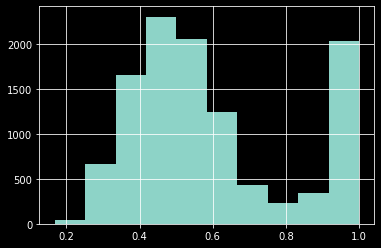

In [138]:
roc_df['proba1'].hist()

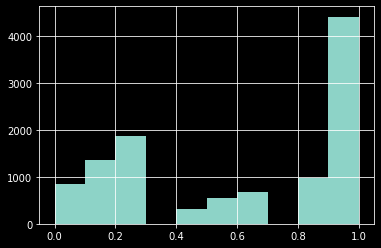

In [139]:
roc_df['proba2'].hist()

In [140]:
roc_df.tail()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2,y_pred_1,y_pred_2
10994,A,Ship,4,1,252,5.0,medium,F,1,1538,1,0.451055,0.9,0,1
10995,B,Ship,4,1,232,5.0,medium,F,6,1247,0,0.615265,0.1,1,0
10996,C,Ship,5,4,242,5.0,low,F,4,1155,0,0.554535,0.2,1,0
10997,F,Ship,5,2,223,6.0,medium,M,2,1210,0,0.473372,0.0,0,0
10998,D,Ship,2,5,155,5.0,low,F,6,1639,0,0.699788,0.1,1,0


In [141]:
def get_conf_matrix(row, pred):
  if row['reached_on_time_y_n'] == 1 and row[pred] == 1:
    return 'tp'
  if row['reached_on_time_y_n'] == 0 and row[pred] == 0:
    return 'tn'
  if row['reached_on_time_y_n'] == 1 and row[pred] == 0:
    return 'fn'
  if row['reached_on_time_y_n'] == 0 and row[pred] == 1:
    return 'fp'

In [142]:
roc_df['conf_matrix_1']= roc_df.apply(get_conf_matrix, pred='y_pred_1', axis=1)
roc_df['conf_matrix_2']= roc_df.apply(get_conf_matrix, pred='y_pred_2', axis=1)

In [143]:
roc_df.tail()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2,y_pred_1,y_pred_2,conf_matrix_1,conf_matrix_2
10994,A,Ship,4,1,252,5.0,medium,F,1,1538,1,0.451055,0.9,0,1,fn,tp
10995,B,Ship,4,1,232,5.0,medium,F,6,1247,0,0.615265,0.1,1,0,fp,tn
10996,C,Ship,5,4,242,5.0,low,F,4,1155,0,0.554535,0.2,1,0,fp,tn
10997,F,Ship,5,2,223,6.0,medium,M,2,1210,0,0.473372,0.0,0,0,tn,tn
10998,D,Ship,2,5,155,5.0,low,F,6,1639,0,0.699788,0.1,1,0,fp,tn


Let's try to get our confusion matrix value counts and check it by sklearn conf matrix

In [144]:
roc_df['conf_matrix_1'].value_counts()

tp    4479
tn    2562
fn    2084
fp    1874
Name: conf_matrix_1, dtype: int64

In [145]:
roc_df['conf_matrix_2'].value_counts()

tp    6383
tn    4414
fn     180
fp      22
Name: conf_matrix_2, dtype: int64

In the second case sum of true values more than 98% and it's better than in the first case. Next step is check our result's by sklearn library

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(roc_df['reached_on_time_y_n'], roc_df['y_pred_1']).ravel()
tn_1, fp_1, fn_1, tp_1

(2562, 1874, 2084, 4479)

In [148]:
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(roc_df['reached_on_time_y_n'], roc_df['y_pred_2']).ravel()
tn_2, fp_2, fn_2, tp_2

(4414, 22, 180, 6383)

Success

In [149]:
roc_df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2,y_pred_1,y_pred_2,conf_matrix_1,conf_matrix_2
0,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0,1,1,tp,tp
1,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0,1,1,tp,tp
2,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0,1,1,tp,tp
3,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0,1,1,tp,tp
4,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0,1,1,tp,tp


Then I'd like to get confusion matrix. Thresholds is necessary for it. Let's get it from our classifier unique values - it will be our thresholds.

In [150]:
thrs1 = list(np.sort(roc_df['proba1'].unique()))
thrs2 = list(np.sort(roc_df['proba2'].unique()))

In [151]:
thrs1 = [0] + thrs1

In [152]:
res1 = []
for thr in thrs1:
  roc_df['y_pred_1'] = (roc_df['proba1'] > thr)*1
  tp = len(roc_df[(roc_df['reached_on_time_y_n']==1)&(roc_df['y_pred_1']==1)])
  tn = len(roc_df[(roc_df['reached_on_time_y_n']==0)&(roc_df['y_pred_1']==0)])
  fp = len(roc_df[(roc_df['reached_on_time_y_n']==0)&(roc_df['y_pred_1']==1)])
  fn = len(roc_df[(roc_df['reached_on_time_y_n']==1)&(roc_df['y_pred_1']==0)])
  res1.append((tp,tn,fp,fn,thr))

res2 = []
for thr in thrs2:
  roc_df['y_pred_2'] = (roc_df['proba2'] > thr)*1
  tp = len(roc_df[(roc_df['reached_on_time_y_n']==1)&(roc_df['y_pred_2']==1)])
  tn = len(roc_df[(roc_df['reached_on_time_y_n']==0)&(roc_df['y_pred_2']==0)])
  fp = len(roc_df[(roc_df['reached_on_time_y_n']==0)&(roc_df['y_pred_2']==1)])
  fn = len(roc_df[(roc_df['reached_on_time_y_n']==1)&(roc_df['y_pred_2']==0)])
  res2.append((tp,tn,fp,fn,thr))

In [153]:
conf_matrix_1 = pd.DataFrame(res1)
conf_matrix_2 = pd.DataFrame(res2)

In [154]:
conf_matrix_1.columns = ['tp', 'tn', 'fp', 'fn', 'thr']
conf_matrix_2.columns = ['tp', 'tn', 'fp', 'fn', 'thr']

In [155]:
conf_matrix_2['check'] = conf_matrix_2['tp'] + conf_matrix_2['tn'] + conf_matrix_2['fp'] + conf_matrix_2['fn']
conf_matrix_2

,tp,tn,fp,fn,thr,check
0,6563,849,3587,0,0.0,10999
1,6563,2206,2230,0,0.1,10999
2,6563,3416,1020,0,0.2,10999
3,6557,4065,371,6,0.3,10999
4,6523,4340,96,40,0.4,10999
5,6383,4414,22,180,0.5,10999
6,6064,4434,2,499,0.6,10999
7,5384,4435,1,1179,0.7,10999
8,4413,4436,0,2150,0.8,10999
9,3398,4436,0,3165,0.9,10999


Let's count true positive rate and false positive rate

In [156]:
conf_matrix_1['tpr'] = conf_matrix_1['tp'] / (conf_matrix_1['tp'] + conf_matrix_1['fn'])
conf_matrix_2['tpr'] = conf_matrix_2['tp'] / (conf_matrix_2['tp'] + conf_matrix_2['fn'])

In [157]:
conf_matrix_1['fpr'] = conf_matrix_1['fp'] / (conf_matrix_1['fp'] + conf_matrix_1['tn'])
conf_matrix_2['fpr'] = conf_matrix_2['fp'] / (conf_matrix_2['fp'] + conf_matrix_2['tn'])

Let's try to plot ROC-curve by our data

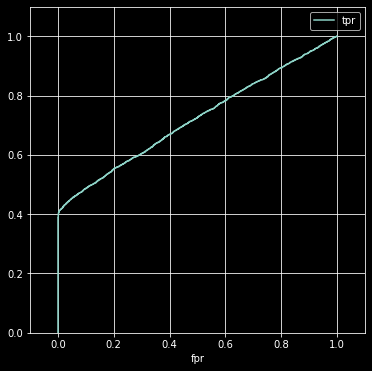

In [158]:
conf_matrix_1.plot(x='fpr', y='tpr', grid=True, figsize=(6,6), xlim=(-0.1,1.1), ylim=(0,1.1))

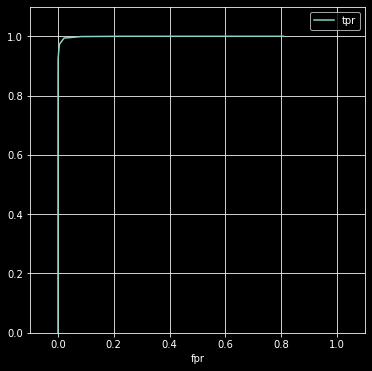

In [159]:
conf_matrix_2.plot(x='fpr', y='tpr', grid=True, figsize=(6,6), xlim=(-0.1,1.1), ylim=(0,1.1))

And check our results by sklearn

In [160]:
from sklearn.metrics import roc_curve

In [161]:
fpr_1, tpr_1, thr_1 = roc_curve(roc_df['reached_on_time_y_n'], roc_df['proba1'])
fpr_2, tpr_2, thr_2 = roc_curve(roc_df['reached_on_time_y_n'], roc_df['proba2'])

In [162]:
t_1 = pd.DataFrame({'fpr':fpr_1, 'tpr':tpr_1,'thr':thr_1})
t_2 = pd.DataFrame({'fpr':fpr_2, 'tpr':tpr_2,'thr':thr_2})

In [163]:
t_2

,fpr,tpr,thr
0,0.000000,0.000000,2.0
1,0.000000,0.517751,1.0
2,0.000000,0.672406,0.9
3,0.000225,0.820357,0.8
4,0.000451,0.923968,0.7
5,0.004959,0.972574,0.6
6,0.021641,0.993905,0.5
7,0.083634,0.999086,0.4
8,0.229937,1.000000,0.3
9,0.502705,1.000000,0.2


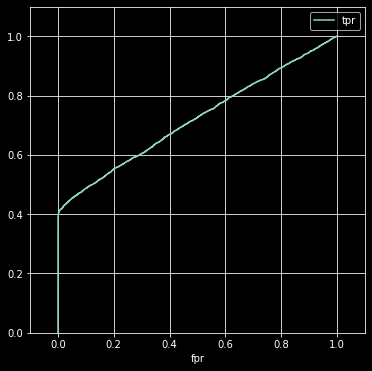

In [164]:
t_1.plot(x='fpr',y='tpr',grid=True,figsize=(6,6),xlim=(-0.1,1.1),ylim=(0,1.1))

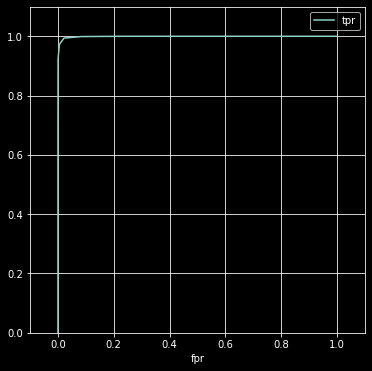

In [165]:
t_2.plot(x='fpr',y='tpr',grid=True,figsize=(6,6),xlim=(-0.1,1.1),ylim=(0,1.1))

Success

##### Вычислить и вывести в консоль коэффициенты AUC для каждого классификатора. Сравнить классификаторы на основе полученных данных, сделать выводы.

Let's try to count AUC coefficients by trapezoid method (when we split area under the curve into several parts-trapezoids and calculate their areas)

In [166]:
conf_matrix_1['tpr - fpr'] = conf_matrix_1['tpr'] - conf_matrix_1['fpr']
conf_matrix_2['tpr - fpr'] = conf_matrix_2['tpr'] - conf_matrix_2['fpr']

In [167]:
conf_matrix_1.sort_values('thr',ascending=False,inplace=True)
conf_matrix_2.sort_values('thr',ascending=False,inplace=True)

In [168]:
conf_matrix_1['area'] = 1/2 * conf_matrix_1['fpr'].diff() * (conf_matrix_1['tpr'] + conf_matrix_1['tpr'].shift())
conf_matrix_2['area'] = 1/2 * conf_matrix_2['fpr'].diff() * (conf_matrix_2['tpr'] + conf_matrix_2['tpr'].shift())

In [169]:
print(conf_matrix_1['area'].sum())
print(conf_matrix_2['area'].sum() + conf_matrix_2['tpr - fpr'][0])

0.7206929109235629
0.9991170581258131


Check it by roc_auc_score and auc methods from sklearn.metrics

In [170]:
from sklearn.metrics import roc_auc_score

fpr_1, tpr_1, thr_1 = roc_curve(roc_df['reached_on_time_y_n'],roc_df['proba1'])
fpr_2, tpr_2, thr_2 = roc_curve(roc_df['reached_on_time_y_n'],roc_df['proba2'])

In [171]:
t = pd.DataFrame({'fpr':fpr_2, 'tpr':tpr_2,'thr':thr_2})
t

,fpr,tpr,thr
0,0.000000,0.000000,2.0
1,0.000000,0.517751,1.0
2,0.000000,0.672406,0.9
3,0.000225,0.820357,0.8
4,0.000451,0.923968,0.7
5,0.004959,0.972574,0.6
6,0.021641,0.993905,0.5
7,0.083634,0.999086,0.4
8,0.229937,1.000000,0.3
9,0.502705,1.000000,0.2


In [172]:
print(roc_auc_score(roc_df['reached_on_time_y_n'], roc_df['proba1']))
print(roc_auc_score(roc_df['reached_on_time_y_n'], roc_df['proba2']))

0.7206929109235629
0.9991170581258131


In [173]:
from sklearn.metrics import auc

print(auc(conf_matrix_1['fpr'], conf_matrix_1['tpr']))
print(auc(conf_matrix_2['fpr'], conf_matrix_2['tpr']) + conf_matrix_2['tpr - fpr'][0])

0.7206929109235629
0.9991170581258131


Also we can check our results by simulation

In [174]:
np.mean(roc_df[roc_df['reached_on_time_y_n']==1].sample(10000,replace=True)['proba2'].values > 
        roc_df[roc_df['reached_on_time_y_n']==0].sample(10000,replace=True)['proba2'].values)

0.9993

In [175]:
np.mean(roc_df[roc_df['reached_on_time_y_n']==1].sample(10000,replace=True)['proba1'].values > 
        roc_df[roc_df['reached_on_time_y_n']==0].sample(10000,replace=True)['proba1'].values)

0.7184

Conclusion: The second classifier has a larger auc coefficient. In terms of statistics AUC also has an interpretation: it indicates the probability that a randomly selected instance of a negative class will be less likely to be recognized as a positive class than a randomly selected positive class. In our case this probability larger for the second classifier.

In [176]:
roc_df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,proba1,proba2,y_pred_1,y_pred_2,conf_matrix_1,conf_matrix_2
0,D,Flight,4,2,177,3.0,low,F,44,1233,1,0.993381,1.0,0,0,tp,tp
1,F,Flight,4,5,216,2.0,low,M,59,3088,1,0.998247,1.0,0,0,tp,tp
2,A,Flight,2,2,183,4.0,low,M,48,3374,1,0.993937,1.0,0,0,tp,tp
3,B,Flight,3,3,176,4.0,medium,M,10,1177,1,0.781256,1.0,0,0,tp,tp
4,C,Flight,2,2,184,3.0,medium,F,46,2484,1,0.994232,1.0,0,0,tp,tp


# Задача 2 (общая работа с Python, типы данных, ООП, библиотека pandas).

Link to the file: https://drive.google.com/file/d/1bDF2mztvEi__8ch4XbtNBmWLXY1zrCeb/view?usp=sharing

In [177]:
!gdown --id 1bDF2mztvEi__8ch4XbtNBmWLXY1zrCeb

Downloading...
From: https://drive.google.com/uc?id=1bDF2mztvEi__8ch4XbtNBmWLXY1zrCeb
To: /content/Problem2.csv
100% 228k/228k [00:00<00:00, 83.5MB/s]


##### Предобработка: на основе исходных данных сформировать DataFrame без неиспользуемых столбцов и содержащий только уже прошедшие игры. Вывести в консоль измерения (кол-во строк х кол-во столбцов) полученного DataFrame до и после предобработки. 

In [178]:
df = pd.read_csv('/content/drive/MyDrive/expert_ra/Problem2.csv')
print('before:', df.shape)

before: (1080, 24)


In [179]:
df = df[['date', 'team1', 'team2', 'elo_prob1', 'elo_prob2', 'score1', 'score2']]
df = df[(~df['score1'].isna()) & (~df['score2'].isna())]
print('after:', df.shape)

after: (864, 7)


In [180]:
df.head()

,date,team1,team2,elo_prob1,elo_prob2,score1,score2
0,2020-12-22,BRK,GSW,0.753458,0.246542,125.0,99.0
1,2020-12-22,LAL,LAC,0.702019,0.297981,109.0,116.0
2,2020-12-23,ORL,MIA,0.487760,0.512240,113.0,107.0
3,2020-12-23,PHI,WAS,0.787713,0.212287,113.0,107.0
4,2020-12-23,CLE,CHO,0.556444,0.443556,121.0,114.0


##### Реализовать класс (объект) Team, содержащий два поля – строковое имя команды и список игр этой команды. Список игр команды должен быть типа «список» и нести в себе экземпляры класса Game, относящиеся к данной команде (объект Game описан далее)

In [181]:
class Team:
  '''Инициализация класса Team'''
  def __init__(self, name, games_list=None):
    '''Инициализация строкового имени команды и списка игр этой команды'''
    self.name = name
    self.games_list = []

Let's check how it works with some examples

In [182]:
t = Team('LAC')
print(t.name, t.games_list)

LAC []


In [183]:
t2 = Team('SAS')
print(t2.name, t2.games_list)

SAS []


##### Реализовать класс Game, описывающий данные об одной игре между командой, указанной в соответствующем экземпляре класса Team, и командой-оппонентом.

In [184]:
class Game:
  '''Инициализация класса Game'''
  def __init__(self, second_team):
    '''Инициализация атрибутов класса Game'''

    t.games_list = []
    #Имя команды-противника
    self.second_team = second_team
    t.games_list.append(self.second_team)
    #Дата игры
    self.date = df[(df['team1'] == t.name) & \
                     (df['team2'] == self.second_team)]['date'].values[0]
    t.games_list.append(self.date)
    #Вероятность победы команды, к которой относится данный экземпляр
    self.own_win_prob = df[(df['team1'] == t.name) & \
                             (df['team2'] == self.second_team)]['elo_prob1'].values[0]
    t.games_list.append(self.own_win_prob)
    #Количество очков команды, к которой относится данный экземпляр
    self.own_points = df[(df['team1'] == t.name) & \
                           (df['team2'] == self.second_team)]['score1'].values[0]
    t.games_list.append(self.own_points)
    #Вероятность победы команды–противника в отдельно взятой игре
    self.opponent_win_prob = df[(df['team1'] == t.name) & \
                                  (df['team2'] == self.second_team)]['elo_prob2'].values[0]
    t.games_list.append(self.opponent_win_prob)
    #Количество очков команды–противника в отдельно взятой игре
    self.opponent_points = df[(df['team1'] == t.name) & \
                                (df['team2'] == self.second_team)]['score1'].values[0]
    t.games_list.append(self.opponent_points)
    #Автоматически вычисляемое булево поле, означающее победу (True) или поражение (False) команды, к которой относится данный экземпляр
    if self.own_points > self.opponent_points:
      self.own_winner = True
    else:
      self.own_winner = False
    t.games_list.append(self.own_winner)
  
  def results_show():
    pass

Let's check that all attributes are created

In [185]:
[i for i in dir(Game('BRK')) if i[:1] != '_']

['date',
 'opponent_points',
 'opponent_win_prob',
 'own_points',
 'own_win_prob',
 'own_winner',
 'results_show',
 'second_team']

Let's check how it works

In [186]:
g = Game('BRK')
t.name, t.games_list

('LAC',
 ['BRK',
  '2021-02-21',
  0.6989354015012044,
  108.0,
  0.3010645984987956,
  108.0,
  False])

Is it True?

In [187]:
df[(df['team1'] == 'LAC') & (df['team2'] == 'BRK')]

,date,team1,team2,elo_prob1,elo_prob2,score1,score2
445,2021-02-21,LAC,BRK,0.698935,0.301065,108.0,112.0


##### Используя предобработанные данные, сформировать словарь экземпляров класса Team для каждой команды. Ключами словаря должны быть краткие имена команд. При формировании для каждой команды заполнить список игр с экземплярами класса Game.